In [2]:
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
import keras
import sklearn

Using TensorFlow backend.


In [3]:
df=pd.read_csv(r"C:\Users\Win10\Desktop\diabetic_data.csv")

In [4]:
len(df)

101766

In [108]:
df.isnull().sum()

encounter_id                   0
patient_nbr                    0
gender                         0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        20
diag_2                       356
diag_3                      1419
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose  

In [6]:
df.groupby('readmitted').size()

readmitted
NO     90409
YES    11357
dtype: int64

In [7]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [8]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [9]:
df[list(df.columns)[:10]].head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1


In [10]:
df[list(df.columns)[10:20]].head()

,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?
1,?,?,59,0,18,0,0,0,276,250.01
2,?,?,11,5,13,2,0,1,648,250
3,?,?,44,1,16,0,0,0,8,250.43
4,?,?,51,0,8,0,0,0,197,157


In [11]:
df[list(df.columns)[20:30]].head()

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide
0,?,1,None,None,No,No,No,No,No,No
1,255,9,None,None,No,No,No,No,No,No
2,V27,6,None,None,No,No,No,No,No,No
3,403,7,None,None,No,No,No,No,No,No
4,250,5,None,None,No,No,No,No,No,No


In [12]:
df[list(df.columns)[30:40]].head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No


In [13]:
df[list(df.columns)[40:]].head()

,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,No,No,No,No,No,No,No,No,No,NO
1,No,Up,No,No,No,No,No,Ch,Yes,NO
2,No,No,No,No,No,No,No,No,Yes,NO
3,No,Up,No,No,No,No,No,Ch,Yes,NO
4,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6 

In [15]:
df = df.replace('?',py.nan)

In [16]:
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [17]:
df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [18]:
df.drop(['race','weight',],axis=1,inplace=True)

In [19]:
df.drop(['payer_code','age'],axis=1,inplace=True)

In [63]:
df.drop(['medical_specialty'],axis=1,inplace=True)

In [71]:
x=df.iloc[:,0:13].values

In [72]:
x

array([[2278392, 8222157, 'Female', ..., 0, 0, 0],
       [149190, 55629189, 'Female', ..., 0, 0, 0],
       [64410, 86047875, 'Female', ..., 2, 0, 1],
       ...,
       [443854148, 41088789, 'Male', ..., 1, 0, 0],
       [443857166, 31693671, 'Female', ..., 0, 0, 1],
       [443867222, 175429310, 'Male', ..., 0, 0, 0]], dtype=object)

In [74]:
x_train=pd.DataFrame(x,columns=['encounter_id','patient_nbr','gender','admission_type_id','discharge_disposition_id','admission_source_i','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient'])
x_train.head()

,encounter_id,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_i,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,8222157,Female,6,25,1,1,41,0,1,0,0,0
1,149190,55629189,Female,1,1,7,3,59,0,18,0,0,0
2,64410,86047875,Female,1,1,7,2,11,5,13,2,0,1
3,500364,82442376,Male,1,1,7,2,44,1,16,0,0,0
4,16680,42519267,Male,1,1,7,1,51,0,8,0,0,0


In [75]:
x_train.isnull().sum()

encounter_id                0
patient_nbr                 0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_i          0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
dtype: int64

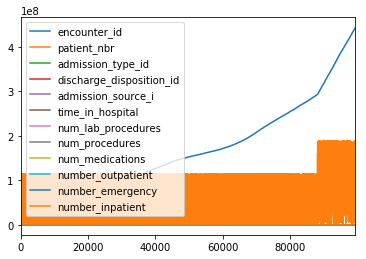

In [76]:
x_train.plot()

In [77]:
length=len(df.columns)

In [78]:
y=df.iloc[:,length-1].values

In [79]:
y=y.reshape(-1,1)
y.shape

(99343, 1)

In [80]:
from sklearn.preprocessing import LabelEncoder 

In [81]:
lb=LabelEncoder()

In [82]:
x[:,2]=lb.fit_transform(x[:,2])

In [83]:
y[:,0]=lb.fit_transform(y[:,0])

In [84]:
py.unique(y)

array([0, 1], dtype=object)

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [94]:
model=Sequential()

In [96]:
model.add(Dense(15,input_shape=(13,)))

In [97]:
model.add(Dense(100,activation='relu'))

In [98]:
#output layer
from keras.utils import to_categorical #convert label encoder to one hot encoder

In [99]:
print(y.shape)
y_train=to_categorical(y)
y_train.shape

(99343, 1)


(99343, 2)

In [100]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [101]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [102]:
model.add(Dense(2,activation='softmax'))

In [103]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [104]:
model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
99343/99343 [==============================] - 7s 72us/step - loss: 14.2093 - acc: 0.1184
Epoch 2/5
99343/99343 [==============================] - 5s 47us/step - loss: 14.2093 - acc: 0.1184
Epoch 3/5
99343/99343 [==============================] - 5s 46us/step - loss: 14.2093 - acc: 0.1184
Epoch 4/5
99343/99343 [==============================] - 5s 46us/step - loss: 14.2093 - acc: 0.1184
Epoch 5/5
99343/99343 [==============================] - 5s 49us/step - loss: 14.2093 - acc: 0.1184


In [115]:
model.predict_classes(py.array([[36900,77391171,1,2,1,4,7,62,0,11,0,0,0]]))


array([0], dtype=int64)

In [116]:
model.predict(py.array([[36900,77391171,1,2,1,4,7,62,0,11,0,0,0]]))

array([[1., 0.]], dtype=float32)

In [105]:
x_train.iloc[0:3]

,encounter_id,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_i,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,8222157,0,6,25,1,1,41,0,1,0,0,0
1,149190,55629189,0,1,1,7,3,59,0,18,0,0,0
2,64410,86047875,0,1,1,7,2,11,5,13,2,0,1


In [45]:
type(x_train)

pandas.core.frame.DataFrame

In [61]:
df

,encounter_id,patient_nbr,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Female,6,25,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Female,1,1,7,3,NaN,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,Female,1,1,7,2,NaN,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Male,1,1,7,2,NaN,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Male,1,1,7,1,NaN,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Male,2,1,2,3,NaN,31,6,...,No,Steady,No,No,No,No,No,No,Yes,0
6,55842,84259809,Male,3,1,2,4,NaN,70,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
7,63768,114882984,Male,1,1,7,5,NaN,73,0,...,No,No,No,No,No,No,No,No,Yes,0
8,12522,48330783,Female,2,1,4,13,NaN,68,2,...,No,Steady,No,No,No,No,No,Ch,Yes,0
9,15738,63555939,Female,3,3,4,12,InternalMedicine,33,3,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [117]:
model.save("readmission.h5")